# Dimensionality reduction using ISOmap

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from rdkit import Chem
import plotly.express as px
import molplotly

## ISOmap on 2D descriptor data of the chemokine receptor

In [33]:
df_2D_desc_ISO = pd.read_csv (r'C:\documenten hier\2D_desc_ccr2.csv')
df_2D_desc_ISO.head()

,InChIKey,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,scaffold,smiles
0,AAMCCXZHVCUGJS-UHFFFAOYSA-N,13.717474,-5.012811,13.717474,0.004832,0.162680,727.775,692.495,727.241566,268,...,0,0,0,1,0,0,0,0,O=C(Cc1ccccn1)Nc1nc(C(CCN2CCC3(C=Cc4ccccc43)CC...,CC1CN(CCC(C(=O)NCc2cc(C(F)(F)F)cc(C(F)(F)F)c2)...
1,AANWVQVQZDEWDD-UHFFFAOYSA-N,12.265263,-0.608446,12.265263,0.123657,0.738889,360.369,344.241,360.111007,134,...,0,0,0,0,0,0,0,1,O=C(NC(=O)c1ccc2c(c1)OCO2)Nc1cccc(-c2ccccc2)c1,O=C(NC(=O)c1cc2c(cc1)OCO2)Nc1cc(-c2ccccc2)ccc1
2,AAZMPANXGYITPF-UHFFFAOYSA-N,12.846593,-4.559210,12.846593,0.179124,0.578779,490.526,461.294,490.219175,188,...,0,0,0,0,0,0,0,0,O=C(CNC(=O)c1ccccc1)NC1CCN(C2CCN(c3ccccc3)CC2)C1,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCN(c3cc...
3,ABHVKYFWPPHTHF-UHFFFAOYSA-N,14.455951,-4.513139,14.455951,0.027561,0.486918,625.689,583.353,625.308719,244,...,0,0,0,0,0,0,0,0,O=C(OCCN1CCOCC1)N1CC2CC(NC3CCOCC3)CC2(C(=O)N2C...,COC1COCCC1NC1CC2CN(C(=O)OCCN3CCOCC3)CC2(C(=O)N...
4,ABOSMIZKCHEJEN-UHFFFAOYSA-N,13.520089,-5.131106,13.520089,0.068672,0.387923,647.682,612.402,647.225247,242,...,1,0,0,0,0,0,0,0,O=C(NC1CCN(C2CCCCC2CS(=O)(=O)c2ccccc2)C1=O)c1c...,CC(C)N(C)C1CCC(N2CCC(NC(=O)c3cc(C(F)(F)F)cc(C(...


In [34]:
features = list(df_2D_desc_ISO.columns.values)
features.remove('InChIKey')
features.remove('scaffold')
features.remove('smiles')

x = df_2D_desc_ISO.loc[ :,features].values # stores all values as numpy.ndarray
y = df_2D_desc_ISO.loc[:,['InChIKey']].values
data_2D = pd.DataFrame(data = x, columns= features)
data_2D.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,13.717474,-5.012811,13.717474,0.004832,0.162680,727.775,692.495,727.241566,268.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,12.265263,-0.608446,12.265263,0.123657,0.738889,360.369,344.241,360.111007,134.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,12.846593,-4.559210,12.846593,0.179124,0.578779,490.526,461.294,490.219175,188.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14.455951,-4.513139,14.455951,0.027561,0.486918,625.689,583.353,625.308719,244.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.520089,-5.131106,13.520089,0.068672,0.387923,647.682,612.402,647.225247,242.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
scaler = StandardScaler()  # not sure if Standard scaler of minmaxScaler should be used, standardscaler seems to make the data more compact. 
data_2D_scaled = scaler.fit_transform(data_2D)

In [59]:
iso = Isomap(n_neighbors=10, n_components=2)
results = iso.fit_transform(data_2D_scaled)

In [60]:
ISO_Df = pd.DataFrame(data = results
             , columns = ['component 1', 'component 2']) # create new dataframe containing the two components
ISO_Df.head()

,component 1,component 2
0,-33.514220,28.203644
1,39.599067,-2.789164
2,-11.330068,-0.414788
3,-27.337706,-18.156200
4,-19.670317,2.900104


In [61]:
final_ISO_Df = pd.concat([ISO_Df, df_2D_desc_ISO[['InChIKey']], df_2D_desc_ISO[['scaffold']], df_2D_desc_ISO[['smiles']]], axis = 1)
final_ISO_Df ['scaffold'] = final_ISO_Df['scaffold'].astype(str)
final_ISO_Df ['smiles'] = final_ISO_Df['smiles'].astype(str)
final_ISO_Df.head(5)

,component 1,component 2,InChIKey,scaffold,smiles
0,-33.514220,28.203644,AAMCCXZHVCUGJS-UHFFFAOYSA-N,O=C(Cc1ccccn1)Nc1nc(C(CCN2CCC3(C=Cc4ccccc43)CC...,CC1CN(CCC(C(=O)NCc2cc(C(F)(F)F)cc(C(F)(F)F)c2)...
1,39.599067,-2.789164,AANWVQVQZDEWDD-UHFFFAOYSA-N,O=C(NC(=O)c1ccc2c(c1)OCO2)Nc1cccc(-c2ccccc2)c1,O=C(NC(=O)c1cc2c(cc1)OCO2)Nc1cc(-c2ccccc2)ccc1
2,-11.330068,-0.414788,AAZMPANXGYITPF-UHFFFAOYSA-N,O=C(CNC(=O)c1ccccc1)NC1CCN(C2CCN(c3ccccc3)CC2)C1,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCN(c3cc...
3,-27.337706,-18.156200,ABHVKYFWPPHTHF-UHFFFAOYSA-N,O=C(OCCN1CCOCC1)N1CC2CC(NC3CCOCC3)CC2(C(=O)N2C...,COC1COCCC1NC1CC2CN(C(=O)OCCN3CCOCC3)CC2(C(=O)N...
4,-19.670317,2.900104,ABOSMIZKCHEJEN-UHFFFAOYSA-N,O=C(NC1CCN(C2CCCCC2CS(=O)(=O)c2ccccc2)C1=O)c1c...,CC(C)N(C)C1CCC(N2CCC(NC(=O)c3cc(C(F)(F)F)cc(C(...


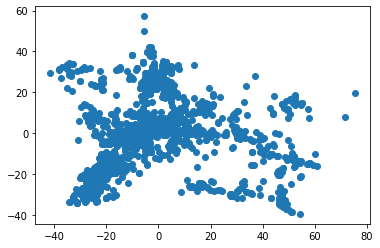

In [62]:
plt.scatter(results[:,0], results[:,1]) #first plot of data after scaling

In [63]:
series = pd.value_counts(final_ISO_Df.scaffold)
mask = (series.lt(10))
final_ISO_Df['scaffold_grouped'] = np.where(final_ISO_Df['scaffold'].isin(series[mask].index),'Other',final_ISO_Df['scaffold'])


In [64]:
symbols = ['circle', 'square', 'diamond', 'cross', 'x',  'pentagon', 'hexagram', 'star',
           'diamond', 'hourglass', 'bowtie']

In [108]:
fig_2D_ISO = px.scatter(final_ISO_Df, x="component 1", y="component 2",
                   color = "scaffold_grouped",symbol='scaffold_grouped',
                    symbol_sequence = symbols,                   
                    
                    title = 'ISOmap on 2D descriptor data after scaling',
                                      width=1200,
                                      height=800)
#fig_2D_MDS.show()
app_scatter = molplotly.add_molecules(fig=fig_2D_ISO,
                                      df=final_ISO_Df,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9160, height=1000)

In [66]:
df = pd.read_csv (r'C:\documenten hier\ccr2_data.csv')
df.head()

,Activity_ID,Quality,source,CID,SMILES,connectivity,InChIKey,InChI,InChI_AuxInfo,target_id,...,type_other,Activity_class,relation,pchembl_value,pchembl_value_Mean,pchembl_value_StdDev,pchembl_value_SEM,pchembl_value_N,pchembl_value_Median,pchembl_value_MAD
0,AAMCCXZHVCUGJS_on_P41597_WT,High,ChEMBL30,CHEMBL231340,CC1CN(CCC(C(=O)NCc2cc(C(F)(F)F)cc(C(F)(F)F)c2)...,AAMCCXZHVCUGJS,AAMCCXZHVCUGJS-UHFFFAOYSA-N,InChI=1S/C37H35F6N5O2S/c1-23-21-48(15-12-35(23...,"""AuxInfo=1/1/N:1,50,49,36,37,51,35,48,45,6,44,...",P41597_WT,...,0,NaN,=,7.890,7.89,0.00,0.00,1.0,7.89,0.00
1,AANWVQVQZDEWDD_on_P41597_WT,Low,ChEMBL30,CHEMBL1688881,O=C(NC(=O)c1cc2c(cc1)OCO2)Nc1cc(-c2ccccc2)ccc1,AANWVQVQZDEWDD,AANWVQVQZDEWDD-UHFFFAOYSA-N,InChI=1S/C21H16N2O4/c24-20(16-9-10-18-19(12-16...,"""AuxInfo=1/1/N:22,21,23,26,20,24,25,27,11,10,1...",P41597_WT,...,0,NaN,<,5.000,5.00,0.00,0.00,1.0,5.00,0.00
2,AAZMPANXGYITPF_on_P41597_WT,High,ChEMBL30,CHEMBL1290522,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCN(c3cc...,AAZMPANXGYITPF,AAZMPANXGYITPF-UHFFFAOYSA-N,"InChI=1S/C25H29F3N4O3/c26-25(27,28)18-6-4-5-17...","""AuxInfo=1/1/N:28,27,29,9,8,10,26,30,22,32,23,...",P41597_WT,...,0,NaN,=,6.190,6.19,0.00,0.00,1.0,6.19,0.00
3,ABHVKYFWPPHTHF_on_P41597_WT,High,ChEMBL30,CHEMBL3115111,COC1COCCC1NC1CC2CN(C(=O)OCCN3CCOCC3)CC2(C(=O)N...,ABHVKYFWPPHTHF,ABHVKYFWPPHTHF-UHFFFAOYSA-N,InChI=1S/C30H42F3N5O6/c1-41-26-18-43-8-3-25(26...,"""AuxInfo=1/0/N:1,32,7,31,21,25,19,6,22,24,18,3...",P41597_WT,...,0,NaN,=,7.010; 7.390,7.20,0.19,0.19,2.0,7.20,0.19
4,ABOSMIZKCHEJEN_on_P41597_WT,High,ChEMBL30,CHEMBL1092748,CC(C)N(C)C1CCC(N2CCC(NC(=O)c3cc(C(F)(F)F)cc(C(...,ABOSMIZKCHEJEN,ABOSMIZKCHEJEN-UHFFFAOYSA-N,InChI=1S/C30H35F6N3O4S/c1-18(2)38(3)23-9-10-26...,"""AuxInfo=1/1/N:1,3,5,41,40,42,39,43,7,8,12,11,...",P41597_WT,...,0,NaN,=,8.460,8.46,0.00,0.00,1.0,8.46,0.00


In [67]:
final_ISO_Df['pchembl_value_Mean'] = df['pchembl_value_Mean']
fig_ISO_2 = px.scatter(final_ISO_Df, x="component 1", y="component 2",
                    color = "pchembl_value_Mean",
                    hover_data = None ,
                    labels={'component 1': 'component 1',
                            'component 2': 'component 2',
                            'pchembl_value_Mean': 'Activity'},
                    
                    title = 'ISOmap on 2D descriptor data after scaling',
                                      width=1000,
                                      height=800)

app_scatter = molplotly.add_molecules(fig=fig_ISO_2,
                                      df=final_ISO_Df,
                                      smiles_col='smiles',
                                      title_col='InChIKey')
                                      #condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9161, height=1000)

## ISOmap on morgan fingerprint data

In [68]:
df_morgan_ISO = pd.read_csv (r'C:\documenten hier\MorganFp_scaffold_ccr2_1024.csv')
df_morgan_ISO.head()

,InChIKey,0,1,2,3,4,5,6,7,8,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,scaffold
0,AAMCCXZHVCUGJS-UHFFFAOYSA-N,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,O=C(Cc1ccccn1)Nc1nc(C(CCN2CCC3(C=Cc4ccccc43)CC...
1,AANWVQVQZDEWDD-UHFFFAOYSA-N,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,O=C(NC(=O)c1ccc2c(c1)OCO2)Nc1cccc(-c2ccccc2)c1
2,AAZMPANXGYITPF-UHFFFAOYSA-N,0,0,0,1,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,O=C(CNC(=O)c1ccccc1)NC1CCN(C2CCN(c3ccccc3)CC2)C1
3,ABHVKYFWPPHTHF-UHFFFAOYSA-N,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,O=C(OCCN1CCOCC1)N1CC2CC(NC3CCOCC3)CC2(C(=O)N2C...
4,ABOSMIZKCHEJEN-UHFFFAOYSA-N,0,1,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,O=C(NC1CCN(C2CCCCC2CS(=O)(=O)c2ccccc2)C1=O)c1c...


In [69]:
features_M = list(df_morgan_ISO.columns.values)
features_M.remove('InChIKey')
features_M.remove('scaffold')

a = df_morgan_ISO.loc[ :,features_M].values # stores all values as numpy.ndarray
b = df_morgan_ISO.loc[:,['InChIKey']].values
data_M = pd.DataFrame(data = a, columns= features_M)
data_M.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [70]:
scaler = StandardScaler()
data_M_scaled = scaler.fit_transform(data_M)

In [72]:
iso_m = Isomap(n_neighbors=15, n_components=2)
iso_m2 = Isomap(n_neighbors=15, n_components=2)
results_M = iso_m.fit_transform(data_M_scaled)
result_2_M = iso_m2.fit_transform(data_M)


In [75]:
print(result_2_M)

[[-23.52729053  13.12695401]
 [  0.47555338  -5.7458493 ]
 [ 23.43067959  -2.77894535]
 ...
 [ 33.85390741  -3.28684056]
 [-10.7316996    2.92606742]
 [-12.58119259   5.43756386]]


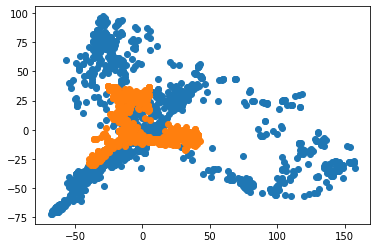

In [106]:
plt.scatter(results_M[:,0], results_M[:,1]) #first plot of data after scaling
plt.scatter(result_2_M[:,0], result_2_M[:,1]) #first plot of data without scaling

### continue on scaled morgan fingerprint data

In [78]:
ISO_morgan = pd.DataFrame(data = results_M
             , columns = ['component 1', 'component 2']) # create new dataframe containing the two components
ISO_morgan.head()

,component 1,component 2
0,-16.393002,11.596451
1,6.794531,-4.419660
2,-26.321286,-24.487803
3,-31.593793,95.387650
4,-7.586535,-19.193845


In [101]:
final_ISO_morgan = pd.concat([ISO_morgan, df_morgan_ISO[['InChIKey']], df_morgan_ISO[['scaffold']]], axis = 1)
final_ISO_morgan ['scaffold'] = final_ISO_morgan['scaffold'].astype(str)
df = pd.read_csv (r'C:\documenten hier\ccr2_data.csv')
final_ISO_morgan['smiles']=df['SMILES']
final_ISO_morgan ['smiles'] = final_ISO_morgan['smiles'].astype(str)
final_ISO_morgan.head(5)

,component 1,component 2,InChIKey,scaffold,smiles
0,-16.393002,11.596451,AAMCCXZHVCUGJS-UHFFFAOYSA-N,O=C(Cc1ccccn1)Nc1nc(C(CCN2CCC3(C=Cc4ccccc43)CC...,CC1CN(CCC(C(=O)NCc2cc(C(F)(F)F)cc(C(F)(F)F)c2)...
1,6.794531,-4.419660,AANWVQVQZDEWDD-UHFFFAOYSA-N,O=C(NC(=O)c1ccc2c(c1)OCO2)Nc1cccc(-c2ccccc2)c1,O=C(NC(=O)c1cc2c(cc1)OCO2)Nc1cc(-c2ccccc2)ccc1
2,-26.321286,-24.487803,AAZMPANXGYITPF-UHFFFAOYSA-N,O=C(CNC(=O)c1ccccc1)NC1CCN(C2CCN(c3ccccc3)CC2)C1,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCN(c3cc...
3,-31.593793,95.387650,ABHVKYFWPPHTHF-UHFFFAOYSA-N,O=C(OCCN1CCOCC1)N1CC2CC(NC3CCOCC3)CC2(C(=O)N2C...,COC1COCCC1NC1CC2CN(C(=O)OCCN3CCOCC3)CC2(C(=O)N...
4,-7.586535,-19.193845,ABOSMIZKCHEJEN-UHFFFAOYSA-N,O=C(NC1CCN(C2CCCCC2CS(=O)(=O)c2ccccc2)C1=O)c1c...,CC(C)N(C)C1CCC(N2CCC(NC(=O)c3cc(C(F)(F)F)cc(C(...


In [80]:
series = pd.value_counts(final_ISO_morgan.scaffold)
mask = (series.lt(10))
final_ISO_morgan['scaffold_grouped'] = np.where(final_ISO_morgan['scaffold'].isin(series[mask].index),'Other',final_ISO_morgan['scaffold'])

In [81]:
fig_ISO_morgan = px.scatter(final_ISO_morgan, x="component 1", y="component 2",
                   color = "scaffold_grouped",symbol='scaffold_grouped',
                    symbol_sequence = symbols,                   
                    
                    title = 'ISOmap on morganfingerprint data after scaling',
                                      width=1200,
                                      height=800)

app_scatter = molplotly.add_molecules(fig=fig_ISO_morgan,
                                      df=final_ISO_morgan,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9163, height=1000)

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

-------------------------------------------------------

In [84]:
final_ISO_morgan['pchembl_value_Mean'] = df['pchembl_value_Mean']
fig_ISO_morgan2 = px.scatter(final_ISO_morgan, x="component 1", y="component 2",
                    color = "pchembl_value_Mean",#symbol='scaffold_grouped',
                   # symbol_sequence = symbols,  
                    hover_data = None ,
                    labels={'component 1': 'component 1',
                            'component 2': 'component 2',
                            'pchembl_value_Mean': 'Activity'},
                    
                    title = 'ISOmap on morgan fingerprint data after scaling',
                                      width=1000,
                                      height=800)

app_scatter = molplotly.add_molecules(fig=fig_ISO_morgan2,
                                      df=final_ISO_morgan,
                                      smiles_col='smiles',
                                      title_col='InChIKey')
                                      #condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9164, height=1000)

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

-------------------------------------------------------

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

-------------------------------------------------------


---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

------------------------------------------------------

## ISOmap on pharmacophore fingerprint data

In [86]:
df_ISO_PharmFp = pd.read_csv (r'C:\documenten hier\PharmacoFp_ccr2.csv')
df_ISO_PharmFp.head()

,InChIKey,0,1,2,3,4,5,6,7,8,...,39964,39965,39966,39967,39968,39969,39970,39971,scaffold,smiles
0,AAMCCXZHVCUGJS-UHFFFAOYSA-N,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,O=C(Cc1ccccn1)Nc1nc(C(CCN2CCC3(C=Cc4ccccc43)CC...,CC1CN(CCC(C(=O)NCc2cc(C(F)(F)F)cc(C(F)(F)F)c2)...
1,AANWVQVQZDEWDD-UHFFFAOYSA-N,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,O=C(NC(=O)c1ccc2c(c1)OCO2)Nc1cccc(-c2ccccc2)c1,O=C(NC(=O)c1cc2c(cc1)OCO2)Nc1cc(-c2ccccc2)ccc1
2,AAZMPANXGYITPF-UHFFFAOYSA-N,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,O=C(CNC(=O)c1ccccc1)NC1CCN(C2CCN(c3ccccc3)CC2)C1,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCN(c3cc...
3,ABHVKYFWPPHTHF-UHFFFAOYSA-N,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,O=C(OCCN1CCOCC1)N1CC2CC(NC3CCOCC3)CC2(C(=O)N2C...,COC1COCCC1NC1CC2CN(C(=O)OCCN3CCOCC3)CC2(C(=O)N...
4,ABOSMIZKCHEJEN-UHFFFAOYSA-N,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,O=C(NC1CCN(C2CCCCC2CS(=O)(=O)c2ccccc2)C1=O)c1c...,CC(C)N(C)C1CCC(N2CCC(NC(=O)c3cc(C(F)(F)F)cc(C(...


In [89]:
data_ISO_Ph = df_ISO_PharmFp.drop(['InChIKey', 'scaffold', 'smiles'], axis=1)
data_ISO_Ph.head()

,0,1,2,3,4,5,6,7,8,9,...,39962,39963,39964,39965,39966,39967,39968,39969,39970,39971
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
iso = Isomap(n_neighbors=15, n_components=2)
ISO_Ph_transform = iso.fit_transform(data_ISO_Ph)

In [92]:
ISO_Ph = pd.DataFrame(data = ISO_Ph_transform
             , columns = ['component 1', 'component 2']) # create new dataframe containing the two components
ISO_Ph.head()

,component 1,component 2
0,-22.589595,-6.340894
1,-18.302761,-21.804426
2,88.170980,23.928078
3,-43.799931,106.703804
4,50.715354,-25.138822


In [93]:
final_ISO_Ph = pd.concat([ISO_Ph, df_ISO_PharmFp[['InChIKey']], df_ISO_PharmFp[['scaffold']], df_ISO_PharmFp[['smiles']]], axis = 1)
final_ISO_Ph ['scaffold'] = final_ISO_Ph['scaffold'].astype(str)
final_ISO_Ph ['smiles'] = final_ISO_Ph['smiles'].astype(str)
final_ISO_Ph.head(5)

,component 1,component 2,InChIKey,scaffold,smiles
0,-22.589595,-6.340894,AAMCCXZHVCUGJS-UHFFFAOYSA-N,O=C(Cc1ccccn1)Nc1nc(C(CCN2CCC3(C=Cc4ccccc43)CC...,CC1CN(CCC(C(=O)NCc2cc(C(F)(F)F)cc(C(F)(F)F)c2)...
1,-18.302761,-21.804426,AANWVQVQZDEWDD-UHFFFAOYSA-N,O=C(NC(=O)c1ccc2c(c1)OCO2)Nc1cccc(-c2ccccc2)c1,O=C(NC(=O)c1cc2c(cc1)OCO2)Nc1cc(-c2ccccc2)ccc1
2,88.170980,23.928078,AAZMPANXGYITPF-UHFFFAOYSA-N,O=C(CNC(=O)c1ccccc1)NC1CCN(C2CCN(c3ccccc3)CC2)C1,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCN(c3cc...
3,-43.799931,106.703804,ABHVKYFWPPHTHF-UHFFFAOYSA-N,O=C(OCCN1CCOCC1)N1CC2CC(NC3CCOCC3)CC2(C(=O)N2C...,COC1COCCC1NC1CC2CN(C(=O)OCCN3CCOCC3)CC2(C(=O)N...
4,50.715354,-25.138822,ABOSMIZKCHEJEN-UHFFFAOYSA-N,O=C(NC1CCN(C2CCCCC2CS(=O)(=O)c2ccccc2)C1=O)c1c...,CC(C)N(C)C1CCC(N2CCC(NC(=O)c3cc(C(F)(F)F)cc(C(...


In [94]:
series = pd.value_counts(final_ISO_Ph.scaffold)
mask = (series.lt(10))
final_ISO_Ph['scaffold_grouped'] = np.where(final_ISO_Ph['scaffold'].isin(series[mask].index),'Other',final_ISO_Ph['scaffold'])

In [95]:
fig_Ph_ISO = px.scatter(final_ISO_Ph, x="component 1", y="component 2",
                   color = "scaffold_grouped",symbol='scaffold_grouped',
                    symbol_sequence = symbols,                   
                    
                    title = 'ISOmap on pharmacophore fingerprint data witthout scaling',
                                      width=1200,
                                      height=800)
#fig_2D_MDS.show()
app_scatter = molplotly.add_molecules(fig=fig_Ph_ISO,
                                      df=final_ISO_Ph,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9165, height=1000)

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

-------------------------------------------------------

In [100]:
final_ISO_Ph['pchembl_value_Mean'] = df['pchembl_value_Mean']
fig_ISO_Ph2 = px.scatter(final_ISO_Ph, x="component 1", y="component 2",
                    color = "pchembl_value_Mean",#symbol='scaffold_grouped',
                  # symbol_sequence = symbols,  
                    hover_data = None ,
                    labels={'component 1': 'component 1',
                            'component 2': 'component 2',
                            'pchembl_value_Mean': 'Activity'},
                    
                    title = 'ISOmap on Pharmacophore fingerprint data without scaling',
                                      width=1000,
                                      height=800)

app_scatter = molplotly.add_molecules(fig=fig_ISO_Ph2,
                                      df=final_ISO_Ph,
                                      smiles_col='smiles',
                                      title_col='InChIKey')
                                      #condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9166, height=1000)

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

-------------------------------------------------------